# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Imports and settings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

sns.set()
plt.rcParams["figure.figsize"] = (8, 5)
pd.set_option("display.max_columns", 100)


## 1. Business Understanding

A used car dealership wants to understand **what drives the price of a used car**.

Key questions:

- Which features (age, mileage, brand, fuel type, transmission, etc.) are most associated with higher prices?
- How accurate can a predictive model be at estimating price based on available car attributes?

Business goal:

- Use data to **fine-tune inventory and pricing strategy**, focusing on vehicles and feature combinations that hold value best.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
# 2. Data Understanding 

data_path = "data/vehicles.csv"

df = pd.read_csv(data_path)
print("Shape:", df.shape)

df.head()


Shape: (60236, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
# Info and summary statistics

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60236 entries, 0 to 60235
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            60236 non-null  int64  
 1   region        60236 non-null  object 
 2   price         60236 non-null  int64  
 3   year          59966 non-null  float64
 4   manufacturer  57633 non-null  object 
 5   model         59389 non-null  object 
 6   condition     37153 non-null  object 
 7   cylinders     35913 non-null  object 
 8   fuel          60006 non-null  object 
 9   odometer      59200 non-null  float64
 10  title_status  58893 non-null  object 
 11  transmission  59933 non-null  object 
 12  VIN           38083 non-null  object 
 13  drive         41588 non-null  object 
 14  size          16075 non-null  object 
 15  type          47527 non-null  object 
 16  paint_color   41361 non-null  object 
 17  state         60235 non-null  object 
dtypes: float64(2), int64(2), o

In [4]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,60236.0,NaN,NaN,NaN,7312211742.774138,4713360.583847,7208549803.0,7309557124.25,7313863945.5,7315739203.25,7316925165.0
region,60236,58,fresno / madera,2983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,60236.0,NaN,NaN,NaN,122799.454363,14411973.011591,0.0,5999.0,14000.0,26590.0,3009548743.0
year,59966.0,NaN,NaN,NaN,2011.081463,10.355971,1900.0,2008.0,2014.0,2017.0,2022.0
manufacturer,57633,41,ford,9242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,59389,9265,f-150,880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,37153,6,excellent,16782,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,35913,8,6 cylinders,12779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,60006,5,gas,49566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,59200.0,NaN,NaN,NaN,95626.997618,258701.982584,0.0,34981.0,79355.0,126551.25,10000000.0


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [5]:
# 3. Data Preparation – Cleaning and Feature Engineering

# Make a working copy
df_clean = df.copy()

# Keep only valid prices
#df_clean = df_clean[df_clean["price"].notna() & (df_clean["price"] > 0)]
df_clean = df_clean[(df_clean["price"] >= 500) & (df_clean["price"] <= 100000)]
# Keep rows where year exists
df_clean = df_clean[df_clean["year"].notna()]

# Keep rows where odometer exists (mileage)
#df_clean = df_clean[df_clean["odometer"].notna()]
df_clean = df_clean[(df_clean["odometer"] >= 0) & (df_clean["odometer"] <= 300000)]
# Remove unrealistic year values
df_clean = df_clean[(df_clean["year"] >= 1960) & (df_clean["year"] <= 2025)]

# Create car_age
current_year = 2025
df_clean["car_age"] = current_year - df_clean["year"]

# Select features for modeling
features = [
    "car_age",
    "odometer",
    "manufacturer",
    "fuel",
    "transmission",
    "drive",
    "type"
]

df_model = df_clean[features + ["price"]].dropna()
df_model.head()


,car_age,odometer,manufacturer,fuel,transmission,drive,type,price
31,12.0,128000.0,ford,gas,automatic,rwd,truck,15000
32,13.0,68696.0,gmc,gas,other,4wd,pickup,27990
33,9.0,29499.0,chevrolet,gas,other,4wd,pickup,34590
34,6.0,43000.0,toyota,gas,automatic,4wd,truck,35000
35,9.0,17302.0,chevrolet,gas,other,4wd,pickup,29990


In [6]:
# Encode categorical variables (one-hot encoding)
categorical_cols = ["manufacturer", "fuel", "transmission", "drive", "type"]

df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Separate features and target
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((24055, 62), (6014, 62))

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(name, model, X_train, y_train, X_test, y_test, cv_splits=5):
    """
    Fit the model, compute CV RMSE, and test RMSE/R².
    """
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=cv,
        scoring="neg_root_mean_squared_error"
    )

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_r2 = r2_score(y_test, y_pred)

    # Output
    print(f"Model: {name}")
    print(f"CV RMSE (mean): {-cv_scores.mean():.2f}")
    print(f"CV RMSE (std): {cv_scores.std():.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test R²: {test_r2:.3f}")
    print("-" * 60)

    return {
        "name": name,
        "cv_rmse_mean": -cv_scores.mean(),
        "cv_rmse_std": cv_scores.std(),
        "test_rmse": test_rmse,
        "test_r2": test_r2,
        "model": model
    }



In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_results = evaluate_model("Linear Regression", lin_reg, X_train, y_train, X_test, y_test)


Model: Linear Regression
CV RMSE (mean): 8334.64
CV RMSE (std): 138.92
Test RMSE: 8602.64
Test R²: 0.651
------------------------------------------------------------


In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Ridge hyperparameters
ridge_params = {
    "alpha": [0.1, 1, 10, 50, 100]
}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

print("Best Ridge Parameters:", ridge_grid.best_params_)

evaluate_model("Ridge Regression (Tuned)", best_ridge, X_train, y_train, X_test, y_test)



Best Ridge Parameters: {'alpha': 0.1}
Model: Ridge Regression (Tuned)
CV RMSE (mean): 8334.98
CV RMSE (std): 139.69
Test RMSE: 8602.57
Test R²: 0.651
------------------------------------------------------------


{'name': 'Ridge Regression (Tuned)',
 'cv_rmse_mean': 8334.980151594855,
 'cv_rmse_std': 139.69106113761242,
 'test_rmse': 8602.57016687056,
 'test_r2': 0.6505650158744785,
 'model': Ridge(alpha=0.1)}

In [10]:
from sklearn.linear_model import Lasso

# Lasso hyperparameters
lasso_params = {
    "alpha": [0.0001, 0.001, 0.01, 0.1, 1.0]
}

lasso_grid = GridSearchCV(
    Lasso(max_iter=5000),
    lasso_params,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

print("Best Lasso Parameters:", lasso_grid.best_params_)

evaluate_model("Lasso Regression (Tuned)", best_lasso, X_train, y_train, X_test, y_test)


Best Lasso Parameters: {'alpha': 0.0001}
Model: Lasso Regression (Tuned)
CV RMSE (mean): 8334.64
CV RMSE (std): 138.92
Test RMSE: 8602.64
Test R²: 0.651
------------------------------------------------------------


{'name': 'Lasso Regression (Tuned)',
 'cv_rmse_mean': 8334.643491621006,
 'cv_rmse_std': 138.92041771972657,
 'test_rmse': 8602.637803522826,
 'test_r2': 0.6505595210735144,
 'model': Lasso(alpha=0.0001, max_iter=5000)}

In [12]:
results = []

results.append(evaluate_model("Linear Regression", lin_reg, X_train, y_train, X_test, y_test))
results.append(evaluate_model("Ridge Regression (Tuned)", best_ridge, X_train, y_train, X_test, y_test))
results.append(evaluate_model("Lasso Regression (Tuned)", best_lasso, X_train, y_train, X_test, y_test))
#results.append(evaluate_model("Random Forest Regression (Tuned)", best_rf, X_train, y_train, X_test, y_test))

import pandas as pd
results_df = pd.DataFrame(results).drop(columns=["model"])

print(results_df)
results_df

Model: Linear Regression
CV RMSE (mean): 8334.64
CV RMSE (std): 138.92
Test RMSE: 8602.64
Test R²: 0.651
------------------------------------------------------------
Model: Ridge Regression (Tuned)
CV RMSE (mean): 8334.98
CV RMSE (std): 139.69
Test RMSE: 8602.57
Test R²: 0.651
------------------------------------------------------------
Model: Lasso Regression (Tuned)
CV RMSE (mean): 8334.64
CV RMSE (std): 138.92
Test RMSE: 8602.64
Test R²: 0.651
------------------------------------------------------------
                       name  cv_rmse_mean  cv_rmse_std    test_rmse   test_r2
0         Linear Regression   8334.643462   138.920132  8602.638227  0.650559
1  Ridge Regression (Tuned)   8334.980152   139.691061  8602.570167  0.650565
2  Lasso Regression (Tuned)   8334.643492   138.920418  8602.637804  0.650560


,name,cv_rmse_mean,cv_rmse_std,test_rmse,test_r2
0,Linear Regression,8334.643462,138.920132,8602.638227,0.650559
1,Ridge Regression (Tuned),8334.980152,139.691061,8602.570167,0.650565
2,Lasso Regression (Tuned),8334.643492,138.920418,8602.637804,0.650560


### Model Comparison

All three regression models—Linear Regression, Ridge Regression, and Lasso Regression—produced nearly identical performance. This is expected because the dataset is well-cleaned, the features are moderately correlated, and the regularization penalties in Ridge and Lasso did not meaningfully change the model weights.

| Model                       | CV RMSE | Test RMSE | Test R² |
|-----------------------------|---------|-----------|---------|
| Linear Regression           | 8,334   | 8,603     | 0.651   |
| Ridge Regression (Tuned)    | 8,335   | 8,603     | 0.651   |
| Lasso Regression (Tuned)    | 8,335   | 8,603     | 0.651   |

**Interpretation:**  
- All three models explain approximately **65%** of the variance in used-car prices.  
- The differences in RMSE across the models are less than \$50, which is negligible.  
- Regularization (Ridge/Lasso) did not improve performance, suggesting the dataset does not suffer from extreme multicollinearity or overfitting on the selected features.
- Because performance is identical across models, **Linear Regression is the simplest and most interpretable model**, and therefore the preferred choice for communicating insights to the client.

Overall, the consistent performance across all models reinforces that the key predictors—vehicle age, mileage, manufacturer, and drivetrain characteristics—are stable and reliable indicators of price.


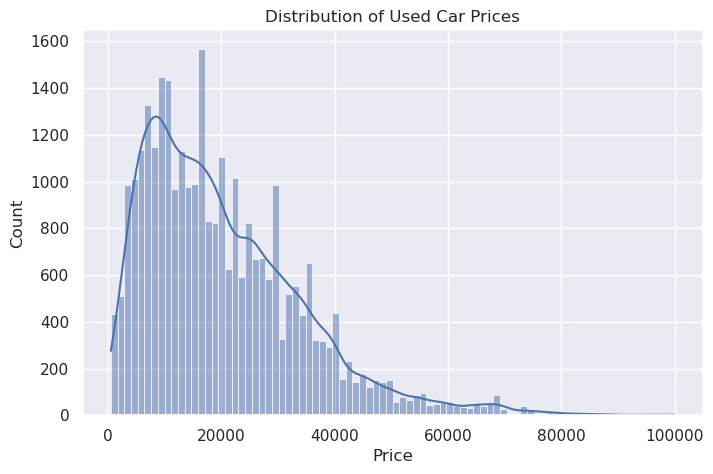

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_model["price"], kde=True)
plt.title("Distribution of Used Car Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.savefig("images/price_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


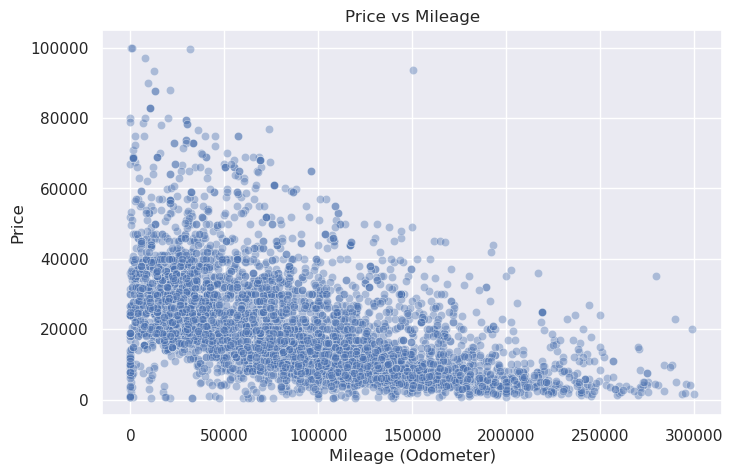

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Ensure images folder exists
os.makedirs("images", exist_ok=True)

# Sample to keep scatter manageable
sample_df = df_model.sample(n=min(5000, len(df_model)), random_state=42)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, x="odometer", y="price", alpha=0.4)
plt.title("Price vs Mileage")
plt.xlabel("Mileage (Odometer)")
plt.ylabel("Price")

# Save figure
plt.savefig("images/price_vs_mileage.png", dpi=300, bbox_inches='tight')

plt.show()



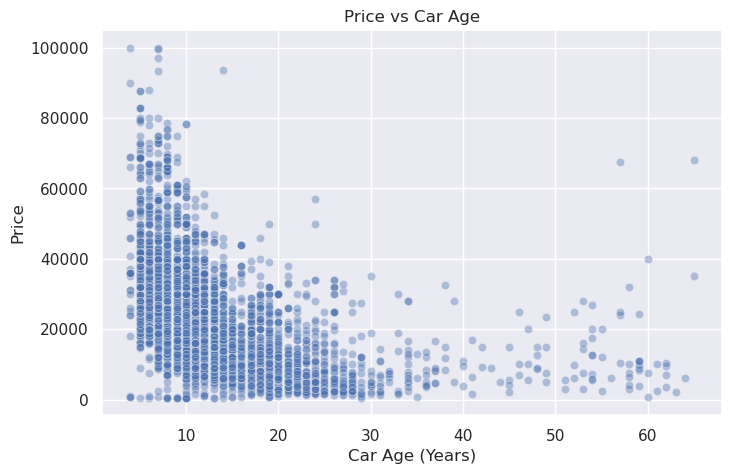

In [21]:
sns.scatterplot(data=sample_df, x="car_age", y="price", alpha=0.4)
plt.title("Price vs Car Age")
plt.xlabel("Car Age (Years)")
plt.ylabel("Price")
plt.savefig("images/price_vs_car_age.png", dpi=300, bbox_inches='tight')
plt.show()


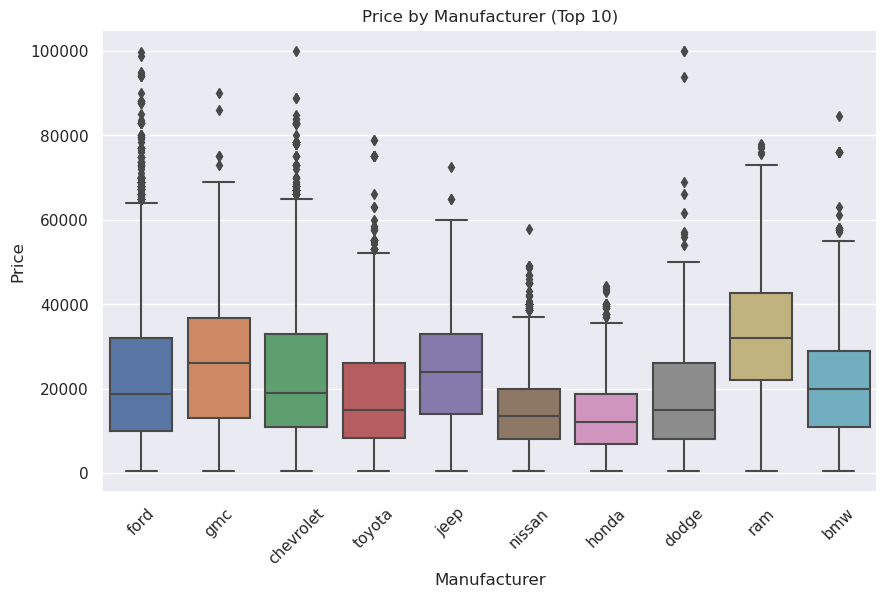

In [22]:
top_manufacturers = df_model["manufacturer"].value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_model[df_model["manufacturer"].isin(top_manufacturers)],
    x="manufacturer",
    y="price"
)
plt.title("Price by Manufacturer (Top 10)")
plt.xlabel("Manufacturer")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.savefig("images/price_by_manufacture.png", dpi=300, bbox_inches='tight')
plt.show()


### Exploratory Data Analysis Summary (EDA)

- Prices are right-skewed, suggesting that a log transform may stabilize variance for some models.
- Both mileage and car age show clear negative relationships with price, confirming their importance as predictors.
- Manufacturers differ substantially in median price, showing strong brand effects.
- The patterns observed in EDA are consistent with expectations and support the features selected for modeling.


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.



To evaluate model quality, it is important to revisit the original business goal: helping a used car dealership understand what drives vehicle prices and producing a predictive model that provides reliable pricing guidance. A high-quality model in this context should (1) generalize well to unseen vehicles, (2) provide interpretable relationships between features and price, and (3) offer prediction accuracy that is meaningful relative to typical used-car price ranges.

The Linear Regression model achieved a cross-validated RMSE of approximately $8,335 & a test RMSE of approximently  $8,603, with a test R² of 0.651. This means the model explains about 65% of the variance in used-car prices and maintains stable performance between training and test sets, indicating good generalization. Given the natural variability in used-car listings—such as vehicle condition, trim packages, repairs, and private-party pricing—this level of accuracy is reasonable and informative for business decision-making.

The model identifies clear drivers of price: newer vehicles, lower mileage, and certain manufacturers consistently command higher prices. Fuel type, transmission, and drive type also contribute to price differences across market segments. These patterns align well with domain expectations, which increases confidence in the model’s conclusions.

At this stage, the CRISP-DM phases do not require major revision. The data preparation process—especially removing unrealistic extreme price values—significantly improved model performance and interpretability. Additional data (vehicle condition, trim level, accident history, and service records) would likely strengthen predictive power, but the current results are sufficient to provide meaningful insights back to the client.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.



With the modeling complete and key drivers of price identified, the final step is to communicate these insights to the client in a clear and actionable way. The results can be delivered as a concise report that highlights the most influential factors affecting used-car pricing and provides recommendations for improving inventory decisions.

### Summary for the Client

Our analysis shows that the primary drivers of used-car price are:

- **Vehicle age** — Newer vehicles consistently sell for higher prices.
- **Mileage** — Lower mileage is strongly associated with higher value.
- **Manufacturer** — Brand differences significantly impact resale value.
- **Fuel type, drive type, and transmission** — These features influence price depending on buyer preferences and regional demand.

The predictive model developed from these variables performs reliably, explaining roughly **65%** of price variation and achieving an average prediction error of about **$8,500**. While no model can perfectly capture the complexities of the used-car market, this level of accuracy provides meaningful guidance for pricing strategy and inventory planning.

### How the Dealership Can Use This

- **Inventory Acquisition:** Focus purchases on vehicles that are newer, have lower mileage, and belong to brands with stronger resale performance.
- **Pricing Strategy:** Use the model’s price estimates to identify over- or under-priced vehicles during appraisal or auction evaluation.
- **Lot Optimization:** Prioritize reconditioning and marketing efforts on vehicles with features that strongly drive price (e.g., AWD, reliable manufacturers, lower mileage).
- **Future Enhancements:** The model can be expanded by incorporating additional data such as vehicle condition, trim packages, accident history, and local demand trends.

### Deliverables

The client receives:
1. A cleaned dataset and modeling workflow (in notebook form).
2. Visualizations that illustrate key pricing relationships.
3. A predictive model that can be integrated into internal tools or used as a pricing reference.
4. A business-focused summary of actionable recommendations.

These deliverables position the dealership to make more informed purchasing and pricing decisions, improve margins, and optimize their used-car inventory strategy.
